In [19]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [20]:
import numpy as np
import pandas as pd

In [21]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [22]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine,func,inspect

In [23]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")
conn = engine.connect ()

In [24]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [25]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [26]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [27]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [28]:
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [ ]:
# #data = pd.read_sql("select * FROM hawaii",conn)
# #print(data)

# #data = engine.execute("SELECT * FROM hawaii")
# data = pd.read_sql("select * FROM Measurement",conn)
# data

In [ ]:
# # let's see all tables inside the database
# cursor = conn.execute("Select * from sqlite_master where type = 'table'")
# for c in cursor:
#     print (c)

In [29]:
# Get a list of column names and types
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'],c['type'])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [30]:
# Get a list of column names and types
columns = inspector.get_columns('station')
for c in columns:
    print(c['name'],c['type'])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [31]:
engine.execute("SELECT * FROM Measurement limit 10").fetchall()

[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0),
 (4, 'USC00519397', '2010-01-04', 0.0, 76.0),
 (5, 'USC00519397', '2010-01-06', None, 73.0),
 (6, 'USC00519397', '2010-01-07', 0.06, 70.0),
 (7, 'USC00519397', '2010-01-08', 0.0, 64.0),
 (8, 'USC00519397', '2010-01-09', 0.0, 68.0),
 (9, 'USC00519397', '2010-01-10', 0.0, 73.0),
 (10, 'USC00519397', '2010-01-11', 0.01, 64.0)]

In [32]:
engine.execute("SELECT * FROM Station limit 10").fetchall()

[(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 (3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0),
 (4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 (5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6),
 (6, 'USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5),
 (7, 'USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9),
 (8, 'USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9),
 (9, 'USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4)]

# Exploratory Climate Analysis

In [38]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

# Calculate the date 1 year ago from the last data point in the database
last_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()[0]
print(last_date)

2017-08-23


In [39]:
year_ago =  dt.date(2017,8,23)- dt.timedelta(365)
print(year_ago)

2016-08-23


In [40]:
# Perform a query to retrieve the data and precipitation scores
prcp = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date<= last_date).\
    filter(Measurement.date >= year_ago).all()

In [41]:
# Save the query results as a Pandas DataFrame and set the index to the date column
prcp_df = pd.DataFrame(prcp, columns = ["date", "precipitation"])
prcp_df = prcp_df.set_index("date")

In [42]:
# Sort the dataframe by date
prcp_df = prcp_df.sort_index()
prcp_df.head()

,precipitation
date,
2016-08-23,0.00
2016-08-23,NaN
2016-08-23,1.79
2016-08-23,0.05
2016-08-23,0.15


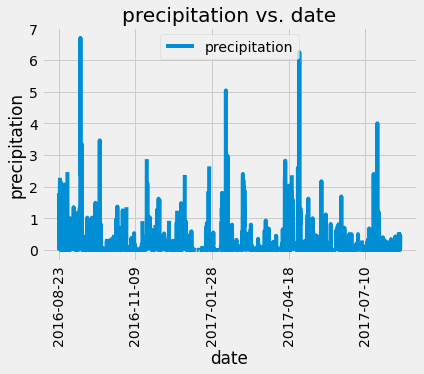

<Figure size 432x288 with 0 Axes>

In [46]:
# Use Pandas Plotting with Matplotlib to plot the data
prcp_df.plot(title = "precipitation vs. date")
plt.xticks(rotation = 90)
plt.ylabel("precipitation")
plt.show()
plt.savefig("precipitation vs. date.png")

In [47]:
# Use Pandas to calcualte the summary statistics for the precipitation data
prcp_df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [49]:
# Design a query to show how many stations are available in this dataset?
st_count = session.query(Measurement.station).group_by(Measurement.station).count()
st_count

9

In [50]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
active_st = session.query(Measurement.station,func.count(Measurement.station)).\
    group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
active_st

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [52]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
stats = [func.min(Measurement.tobs),
                 func.max(Measurement.tobs),
                 func.avg(Measurement.tobs)]
active_st_temp = session.query(*stats).\
    filter(Measurement.station == active_st[0][0]).all()
active_st_temp

[(54.0, 85.0, 71.66378066378067)]

In [ ]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


In [53]:
active_st_temp = session.query(Measurement.tobs).\
    filter(Measurement.date<=last_day).filter(Measurement.date>=year_ago).\
    filter(Measurement.station == active_st[0][0]).all()

In [54]:
active_st_temp_df = pd.DataFrame(active_st_temp)
active_st_temp_df.head()

,tobs
0,77.0
1,77.0
2,80.0
3,80.0
4,75.0


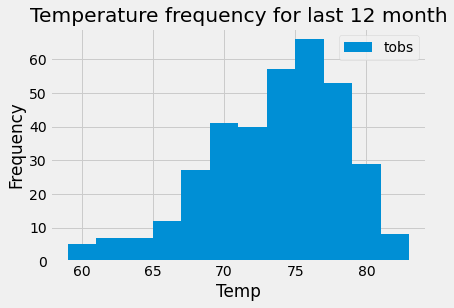

<Figure size 432x288 with 0 Axes>

In [56]:
plt.hist(active_st_temp_df["tobs"],bins=12, label = "tobs")
plt.title("Temperature frequency for last 12 month")
plt.ylabel("Frequency")
plt.xlabel("Temp")
plt.legend()
plt.show()
plt.savefig("Temperature frequency for last 12 month")

## Bonus Challenge Assignment

In [57]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [63]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
trip_dt_temp = calc_temps('2017-02-28', '2017-03-05')[0]
trip_dt_temp

(64.0, 72.02777777777777, 78.0)

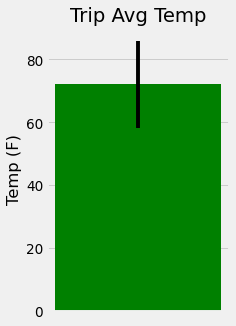

In [66]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)

x_pos = [0]
y_pos = [trip_dt_temp[1]]
error = [(trip_dt_temp[2] - trip_dt_temp[0])]

plt.figure(figsize=(w, h), dpi=d)
plt.bar(x_pos,y_pos,color='green', yerr=error)

plt.title("Trip Avg Temp")
plt.ylabel("Temp (F)")

plt.tick_params(axis='x',which='both',bottom=False,top=False,labelbottom=False)
plt.grid(which='major', axis='x', linestyle='')
plt.grid(which='major', axis='y', linestyle='-')
plt.show()

In [67]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation
rainfall = session.query(Station.station,Station.name,Station.latitude,Station.longitude,Station.elevation,
                         func.avg(Measurement.prcp)).\
    filter(Measurement.station == Station.station).\
    filter(Measurement.date >=  "2017-02-28").\
    filter(Measurement.date <= "2017-03-05").group_by(Station.station).\
    order_by(func.avg(Measurement.prcp).desc()).all()
rainfall

[('USC00517948',
  'PEARL CITY, HI US',
  21.3934,
  -157.9751,
  11.9,
  0.9933333333333333),
 ('USC00519281',
  'WAIHEE 837.5, HI US',
  21.45167,
  -157.84888999999998,
  32.9,
  0.7866666666666667),
 ('USC00513117',
  'KANEOHE 838.1, HI US',
  21.4234,
  -157.8015,
  14.6,
  0.7416666666666667),
 ('USC00516128',
  'MANOA LYON ARBO 785.2, HI US',
  21.3331,
  -157.8025,
  152.4,
  0.6783333333333333),
 ('USC00514830',
  'KUALOA RANCH HEADQUARTERS 886.9, HI US',
  21.5213,
  -157.8374,
  7.0,
  0.5800000000000001),
 ('USC00519523',
  'WAIMANALO EXPERIMENTAL FARM, HI US',
  21.33556,
  -157.71139,
  19.5,
  0.46399999999999997),
 ('USC00519397',
  'WAIKIKI 717.2, HI US',
  21.2716,
  -157.8168,
  3.0,
  0.4566666666666666)]

In [68]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [69]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`
normals = []

# Set the start and end date of the trip
start_date = dt.date(2017,2,28)
end_date = dt.date(2017,3,5)
step = dt.timedelta(365)

# Use the start and end date to create a range of dates
dates = pd.date_range(start_date-step, end_date-step)

# Stip off the year and save a list of %m-%d strings
dates = dates.strftime("%m-%d")

# Loop through the list of %m-%d strings and calculate the normals for each date
trip_normal = []
for i in dates:
    trip_normal.extend(daily_normals(i))
trip_normal

[(67.0, 71.73333333333333, 79.0),
 (64.0, 70.0327868852459, 76.0),
 (61.0, 70.36666666666666, 78.0),
 (60.0, 70.06896551724138, 78.0),
 (57.0, 69.27272727272727, 77.0),
 (60.0, 67.89090909090909, 76.0)]

In [70]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index
trip_normal_df = pd.DataFrame(trip_normal, columns = ["tmin", "tave", "tmax"],
                             index = pd.date_range("2017-02-28","2017-03-05").strftime("%Y-%m-%d"))

trip_normal_df

,tmin,tave,tmax
2017-02-28,67.0,71.733333,79.0
2017-03-01,64.0,70.032787,76.0
2017-03-02,61.0,70.366667,78.0
2017-03-03,60.0,70.068966,78.0
2017-03-04,57.0,69.272727,77.0
2017-03-05,60.0,67.890909,76.0


<Figure size 864x576 with 0 Axes>

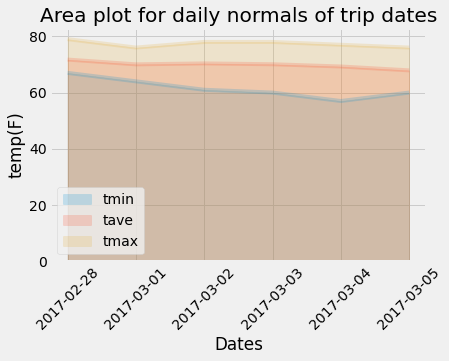

In [71]:
# Plot the daily normals as an area plot with `stacked=False`
plt.figure(figsize = (12,8))
trip_normal_df.plot.area(stacked = False, alpha = 0.2)
plt.xticks(rotation = 45)
plt.title("Area plot for daily normals of trip dates")
plt.ylabel("temp(F)")
plt.xlabel("Dates")
plt.savefig("Area plot for daily normals of trip dates.png")